In [1]:

import pandas as pd
import requests
from io import BytesIO

base_url = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/"
creation = "20250520"

#function for downloading files
def download_csv_gz(file_name):
    url = base_url + file_name
    print(f"Downloading {url}")
    r = requests.get(url)
    r.raise_for_status()
    return pd.read_csv(BytesIO(r.content), compression='gzip', low_memory=False)

data = {}

for i in range(1951,1981):
    year = i
    details_file = f"StormEvents_details-ftp_v1.0_d{year}_c{creation}.csv.gz"
    df_details = download_csv_gz(details_file)

    df_details.columns = df_details.columns.str.lower()

    assert 'event_id' in df_details.columns, "event_id missing from details"


    df_clean = df_details[['state','year', 'begin_lat','begin_lon']]

    #df_clean.to_csv("{year}file.csv", index=False)
    #print(tornado_summary.head())
    exclude_states =  ['ALASKA', 'HAWAII', 'PUERTO RICO', 'GUAM', 'AMERICAN SAMOA', 'COMMONWEALTH OF THE NORTHERN MARIANA ISLANDS', 'UNITED STATES MINOR OUTLYING ISLANDS']

    state_filtered_df = df_clean[~df_clean['state'].isin(exclude_states)]
    state_filtered_df_clean = state_filtered_df.dropna()

    #state_filtered_df_clean.to_csv(f"{year}_summary.csv", index=False)
    data[i] = state_filtered_df_clean

    

In [10]:
import pandas as pd
from scipy.stats import median_abs_deviation

# Create an empty list to store rows
rows = []

for i in range(1951,1981):  # Example loop
    a1 = i
    math_data_df = data[i][['year','begin_lat','begin_lon']]
    a2 = math_data_df['begin_lat'].median()
    a3 = median_abs_deviation(math_data_df['begin_lat'], scale='normal')
    a4 = math_data_df['begin_lon'].median()
    a5 = median_abs_deviation(math_data_df['begin_lon'], scale='normal')
    
    rows.append([a1, a2, a3, a4, a5])  # Append the row as a list

# Create DataFrame once after the loop
regress_df = pd.DataFrame(rows, columns=['year', 'begin_lat_median', 'begin_lat_mad', 'begin_lon_median', 'begin_lon_mad'])

In [11]:
regress_df


,year,begin_lat_median,begin_lat_mad,begin_lon_median,begin_lon_mad
0,1951,37.630,3.558245,-96.830,6.686536
1,1952,35.950,4.329198,-91.700,8.109834
2,1953,37.030,6.323298,-93.900,6.923752
3,1954,37.030,5.292890,-94.470,6.538276
4,1955,37.280,4.625719,-96.180,6.404842
5,1956,38.580,4.566415,-95.080,6.627232
6,1957,36.680,4.892587,-95.180,7.531619
7,1958,38.780,4.596067,-95.900,8.969743
8,1959,37.780,4.848109,-95.280,6.093495
9,1960,38.080,4.759153,-95.180,6.997882


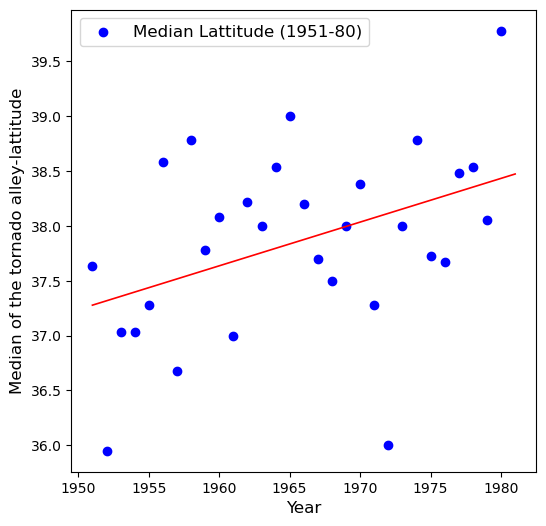

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from sklearn.linear_model import LinearRegression

X_systematic = np.linspace(1951, 1981, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lat_median'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

plt.figure(figsize=(6, 6))

## Plot the observations
plt.scatter(x, y, c="b", label="Median Lattitude (1951-80)")

## Make labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("Median of the tornado alley-lattitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)



plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)

plt.show()


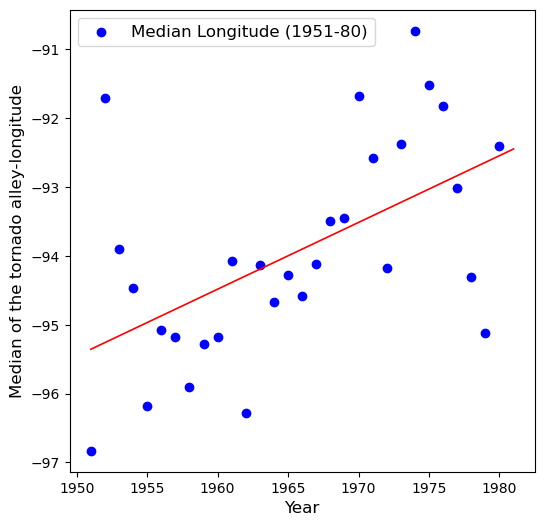

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from sklearn.linear_model import LinearRegression

X_systematic = np.linspace(1951, 1981, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lon_median'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

plt.figure(figsize=(6, 6))

## Plot the observations
plt.scatter(x, y, c="b", label="Median Longitude (1951-80)")

## Make labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("Median of the tornado alley-longitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)



plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)

plt.show()


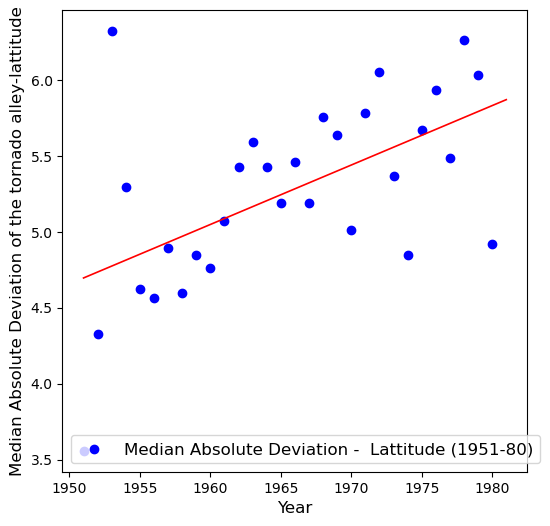

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from sklearn.linear_model import LinearRegression

X_systematic = np.linspace(1951, 1981, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lat_mad'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

plt.figure(figsize=(6, 6))

## Plot the observations
plt.scatter(x, y, c="b", label="Median Absolute Deviation -  Lattitude (1951-80)")

## Make labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("Median Absolute Deviation of the tornado alley-lattitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)



plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)

plt.show()


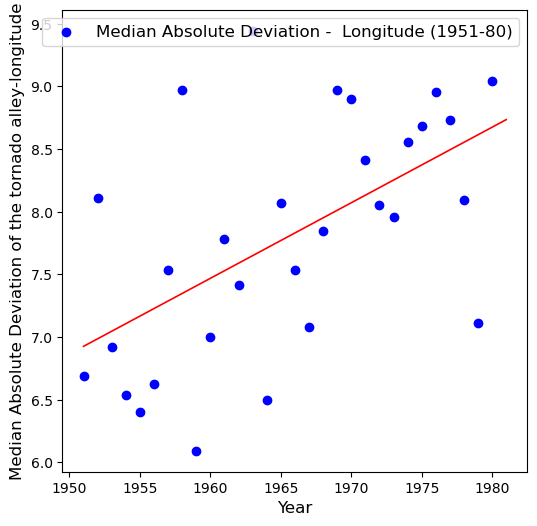

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from sklearn.linear_model import LinearRegression

X_systematic = np.linspace(1951, 1981, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lon_mad'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

plt.figure(figsize=(6, 6))

## Plot the observations
plt.scatter(x, y, c="b", label="Median Absolute Deviation -  Longitude (1951-80)")

## Make labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("Median Absolute Deviation of the tornado alley-longitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)



plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)

plt.show()
